In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('/content/wines_SPA.csv')

In [3]:
df


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


<ipython-input-4-033955de9903>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

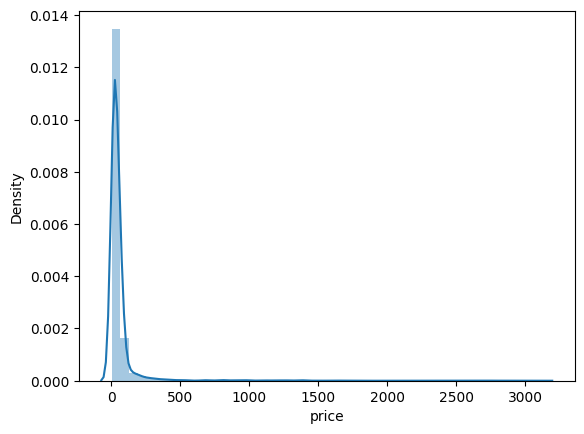

In [4]:
# categorical cols cant have outliers
sns.distplot(df['price'])

In [5]:
#  well use iqr method
df['price'].skew()
df['price'].describe()

,price
count,7500.000000
mean,60.095822
std,150.356676
min,4.990000
25%,18.900000
50%,28.530000
75%,51.350000
max,3119.080000


<Axes: ylabel='price'>

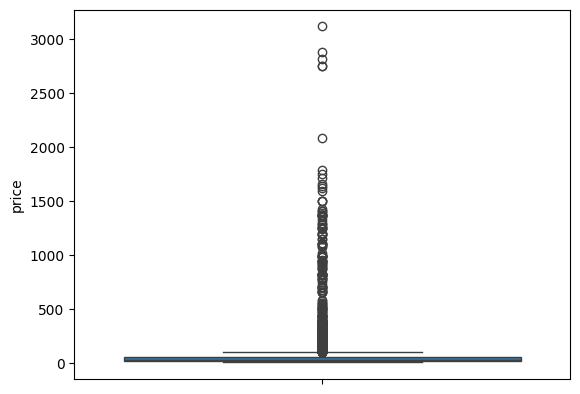

In [6]:
sns.boxplot(df['price'])

In [7]:
iqr=df['price'].quantile(0.75)-df['price'].quantile(0.25)
upper_linmit=df['price'].quantile(0.75)+1.5*iqr
lower_limit=df['price'].quantile(0.25)-1.5*iqr

In [8]:
df['price']=np.where(df['price']>upper_linmit,upper_linmit,np.where(df['price']<lower_limit,lower_limit,df['price']))


<Axes: ylabel='price'>

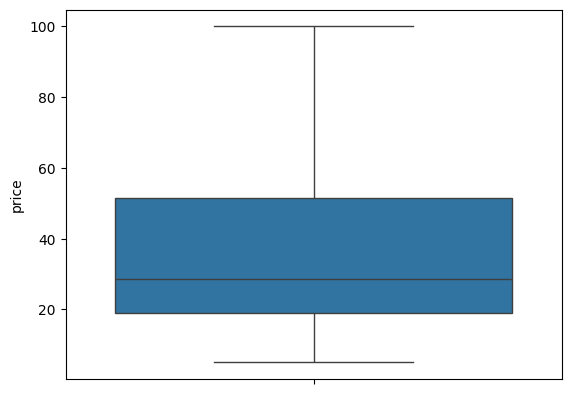

In [9]:
sns.boxplot(df['price']) #as seen from box plot removed outliers using iqr method didnt udse z score duw to high skewness of data

<ipython-input-10-a3ce3f44b75c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['acidity'])


<Axes: xlabel='acidity', ylabel='Density'>

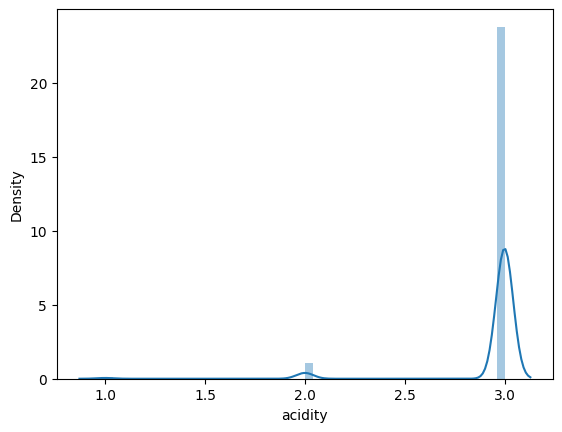

In [10]:
sns.distplot(df['acidity'])

In [11]:
# using capping
iqr=df['acidity'].quantile(0.75)-df['acidity'].quantile(0.25)
upper_cap=df['acidity'].quantile(0.75)+(1.5*iqr)
lower_cap=df['acidity'].quantile(0.25)-(1.5*iqr)

<Axes: ylabel='acidity'>

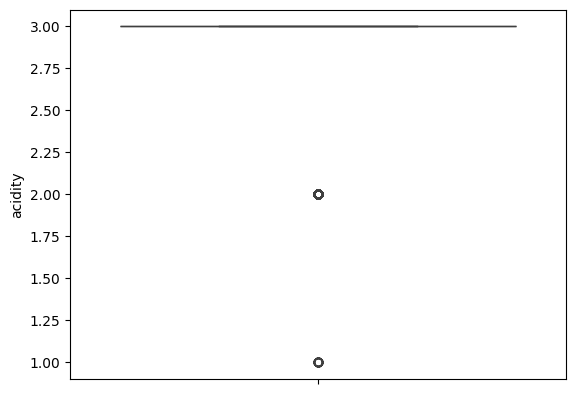

In [12]:
sns.boxplot(df['acidity'])

In [13]:
df['acidity']=np.where(df['acidity']>upper_cap,upper_cap,np.where(df['acidity']<lower_cap,lower_cap,df['acidity']))

<Axes: ylabel='acidity'>

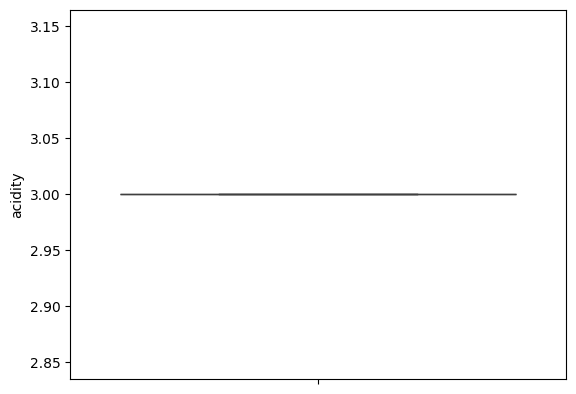

In [14]:
sns.boxplot(df['acidity']) # as seen outlier are gone

<ipython-input-15-81b686a4ff17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['body'])


<Axes: xlabel='body', ylabel='Density'>

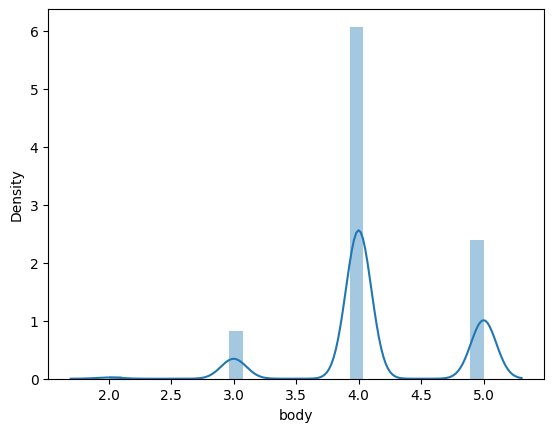

In [15]:
sns.distplot(df['body'])

In [16]:
df['body'].skew()

np.float64(-0.19899269531188457)

<Axes: ylabel='body'>

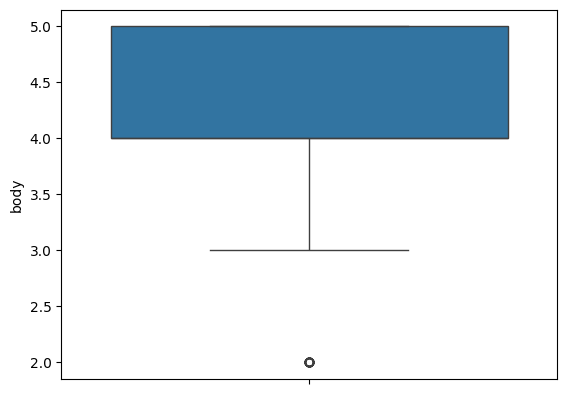

In [17]:
sns.boxplot(df['body'])

In [18]:
iqr=df['body'].quantile(0.75)-df['body'].quantile(0.25)
upper_bound=df['body'].quantile(0.75)+(1.5*iqr)
lower_bound=df['body'].quantile(0.25)-(1.5*iqr)

In [20]:
df['body']=np.where(df['body']>upper_bound,upper_bound,np.where(df['body']<lower_bound,lower_bound,df['body']))

<Axes: ylabel='body'>

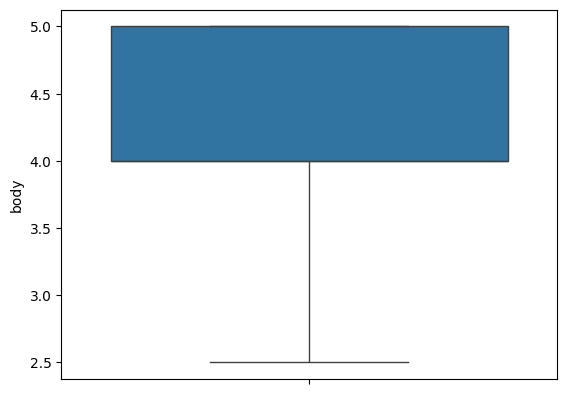

In [21]:
sns.boxplot(df['body'])

<Axes: ylabel='num_reviews'>

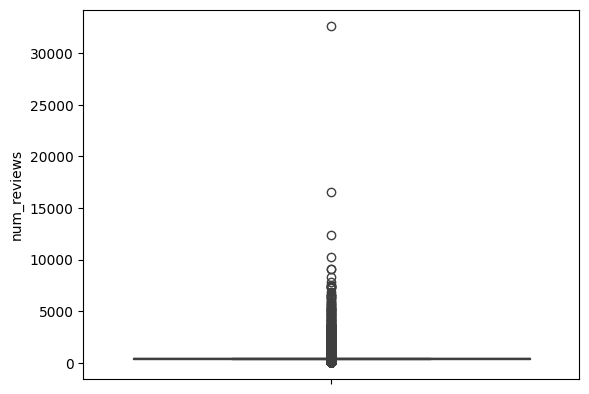

In [22]:
sns.boxplot(df['num_reviews'])

In [23]:
#very skewed so using caping
iqr=df['num_reviews'].quantile(0.75)-df['num_reviews'].quantile(0.25)
upper_limit1=df['num_reviews'].quantile(0.75)+(1.5*iqr)
lower_limit1=df['num_reviews'].quantile(0.25)-(1.5*iqr)

In [24]:
df['num_reviews']=np.where(df['num_reviews']>upper_limit1,upper_limit1,np.where(df['num_reviews']<lower_limit1,lower_limit1,df['num_reviews']))

<Axes: ylabel='num_reviews'>

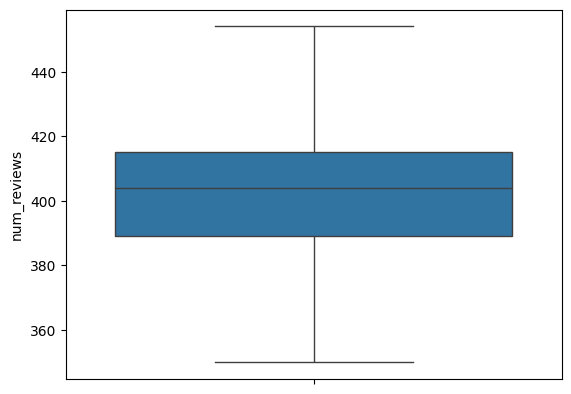

In [25]:
sns.boxplot(df['num_reviews']) #removed outliers

<ipython-input-26-8b0ba353a872>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])


<Axes: xlabel='rating', ylabel='Density'>

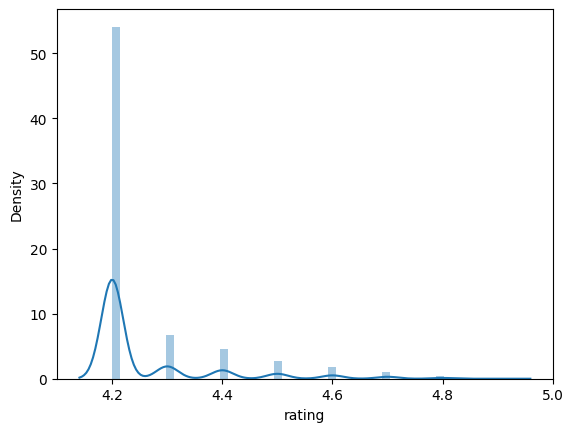

In [26]:
sns.distplot(df['rating'])

<Axes: ylabel='rating'>

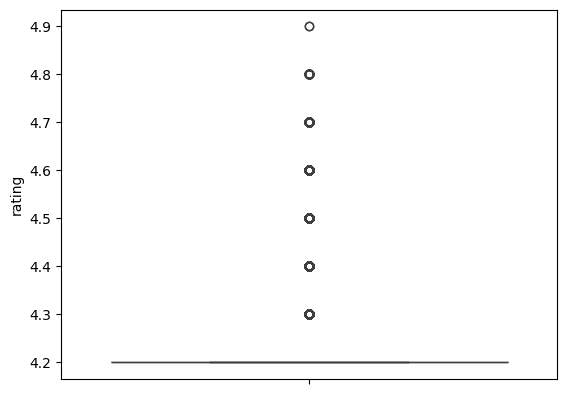

In [27]:
sns.boxplot(df['rating'])

In [28]:
iqr=df['rating'].quantile(0.75)-df['rating'].quantile(0.25)
upper_limit2=df['rating'].quantile(0.75)+(1.5*iqr)
lower_limit2=df['rating'].quantile(0.25)-(1.5*iqr)

In [29]:
df['rating']=np.where(df['rating']>upper_limit2,upper_limit2,np.where(df['rating']<lower_limit2,lower_limit2,df['rating']))

<Axes: ylabel='rating'>

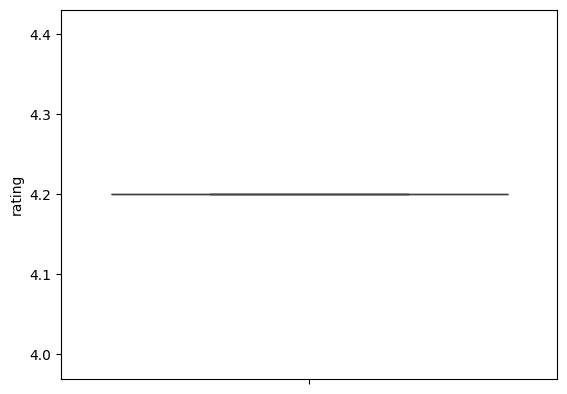

In [30]:
sns.boxplot(df['rating'])

<ipython-input-31-8b0ba353a872>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])


<Axes: xlabel='rating', ylabel='Density'>

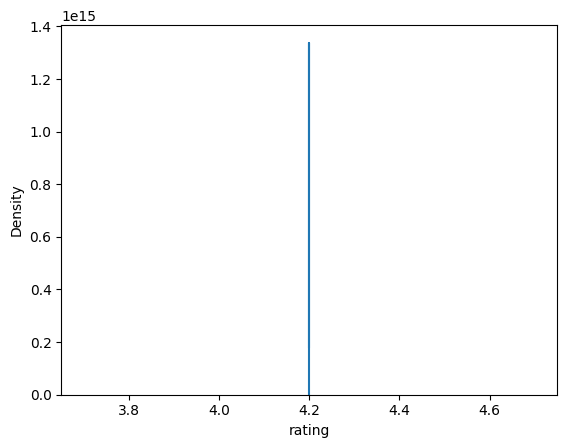

In [31]:
sns.distplot(df['rating'])

In [33]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.2,350.0,Espana,Toro,100.025,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.2,350.0,Espana,Vino de Espana,100.025,Tempranillo,4.0,3.0
2,Vega Sicilia,Unico,2009,4.2,454.0,Espana,Ribera del Duero,100.025,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.2,454.0,Espana,Ribera del Duero,100.025,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.2,454.0,Espana,Ribera del Duero,100.025,Ribera Del Duero Red,5.0,3.0


In [34]:
df.isnull().sum() #now tackling missing values

,0
winery,0
wine,0
year,2
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


In [35]:
df.shape

(7500, 11)

In [36]:
#since the missing values is more than 5% in each case well remove them
df.dropna(inplace=True)

In [37]:
df.shape

(6329, 11)

In [38]:
#assuming we want to find the price
x=df.drop('price',axis=1)
y=df['price']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
import pandas as pd


categorical_cols = ['winery', 'wine', 'country', 'region', 'type']


x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)


In [45]:
x_train

,year,rating,num_reviews,body,acidity,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,winery_Acustic Celler,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
5888,2014,4.2,404.0,4.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1284,2019,4.2,370.0,5.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7441,2011,4.2,402.0,4.0,3.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2906,2015,4.2,414.0,3.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3481,2015,4.2,414.0,3.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,2017,4.2,390.0,4.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6188,N.V.,4.2,405.0,4.0,3.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6226,2015,4.2,420.0,4.0,3.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6429,2012,4.2,420.0,4.0,3.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [44]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(x_train,y_train)

ValueError: could not convert string to float: 'N.V.'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Identify columns with 'object' dtype (likely containing strings)
categorical_cols = x_train.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to these columns
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True) # Apply to x_test as well


# Check and handle remaining non-numeric columns (like the one with 'N.V.')
for col in x_train.select_dtypes(include=['object']).columns:
    # If 'N.V.' is present in the column, handle it (e.g., using Label Encoding)
    if 'N.V.' in x_train[col].unique():
        le = LabelEncoder()
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.transform(x_test[col]) # Apply to x_test as well

lr = LinearRegression()
lr.fit(x_train, y_train)

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

categorical_cols = x_train.select_dtypes(include=['object']).columns.tolist()

all_categories = pd.get_dummies(pd.concat([x_train, x_test], axis=0),
                                 columns=categorical_cols, drop_first=True).columns
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_train = x_train.reindex(columns=all_categories, fill_value=0)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)
x_test = x_test.reindex(columns=all_categories, fill_value=0)


for col in x_train.select_dtypes(include=['object']).columns:

    if 'N.V.' in x_train[col].unique():
        le = LabelEncoder()
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.transform(x_test[col])  # Apply to x_test as well

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [49]:
y_pred=lr.predict(x_test)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse",mse)
print("mae",mae)
print("r2",r2)
# r2 score of 0.85 is good so good accuracy

mse 107.11575793418149
mae 4.2266829988989025
r2 0.8526169279977851


In [54]:
#we cant use logistic reg in this case as its better for categorical output

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

In [59]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("r2",r2)
print("mse",mse)
print("mae",mae)

r2 0.6829829465081627
mse 230.40313586575792
mae 5.312975600301652


In [ ]:
#as we see decision tree is not good and its r2 score is less than linear reg so linear reg is better

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [62]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("r2",r2)
print("mse",mse)
print("mae",mae)

r2 0.7874206489237885
mse 154.49941436519012
mae 4.750953199620936


In [ ]:
# so as we see random forst is better than dec tree as it reloies on multiple dec trees

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [64]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("r2",r2)
print("mse",mse)
print("mae",mae)

r2 0.7771854959792652
mse 161.93816666103322
mae 5.311174526006132


In [ ]:
#accuracy of KNN is almost same as Random Forest

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [68]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("r2",r2)
print("mse",mse)
print("mae",mae)

r2 0.7500263607427563
mse 181.67700990927182
mae 8.220067332734141


In [ ]:
#almost same accuracy for this algorithm also

In [69]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("r2",r2)
print("mse",mse)
print("mae",mae)



r2 -0.06922471860483381
mse 777.0961385144524
mae 19.576973988938313


In [ ]:
# a negative r2 score is a red flag so we cant use this algo at all!!!

# New Section